# jet systematics

Given the analysis requires at least two jets and is binned in the number of b tags, the effect of uncertainties of the jets on the branching fractions should be considered.  The main sources to consider are:

   * jet energy scale
   * jet energy resolution
   * b tag efficiency scale factor
   * mistag efficiency scale factors
   
The first two uncertainty sources affect the overall number of events that are accepted, whereas all of these will cause migration between b tag multiplicity bins.  This is obviously the case for the efficiency scale factors; the jet energy uncertainty impacts the b tag multiplicity due to the pt dependence of the scale factors.

In [1]:
# imports and configuration
%cd /home/naodell/work/wbr/analysis

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('default')

import scripts.plot_tools as pt
import scripts.systematic_tools as st
from scripts.blt_reader import jec_source_names

pt.set_default_style()
%connect_info

/home/naodell/work/wbr/analysis
Welcome to JupyROOT 6.14/04
{
  "shell_port": 58149,
  "iopub_port": 39835,
  "stdin_port": 57341,
  "control_port": 45329,
  "hb_port": 37287,
  "ip": "127.0.0.1",
  "key": "f097942d-375d4566aa5ce0e288db3c52",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-58ce91bd-3bd1-470a-8c63-accff0288c2c.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [2]:
# Get the data (unbinned)
### get the data and prepare labels

selection = 'ee'
dm = pt.DataManager(input_dir     = f'local_data/flatuples/new_jes_syst/{selection}_2016',
                    dataset_names = ['ttbar_inclusive'],
                    selection     = selection,
                    period        = 2016,
                    scale         = 35.9e3,
                    cuts          = pt.cuts[selection]
                   )

df = dm.get_dataframe('ttbar')

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


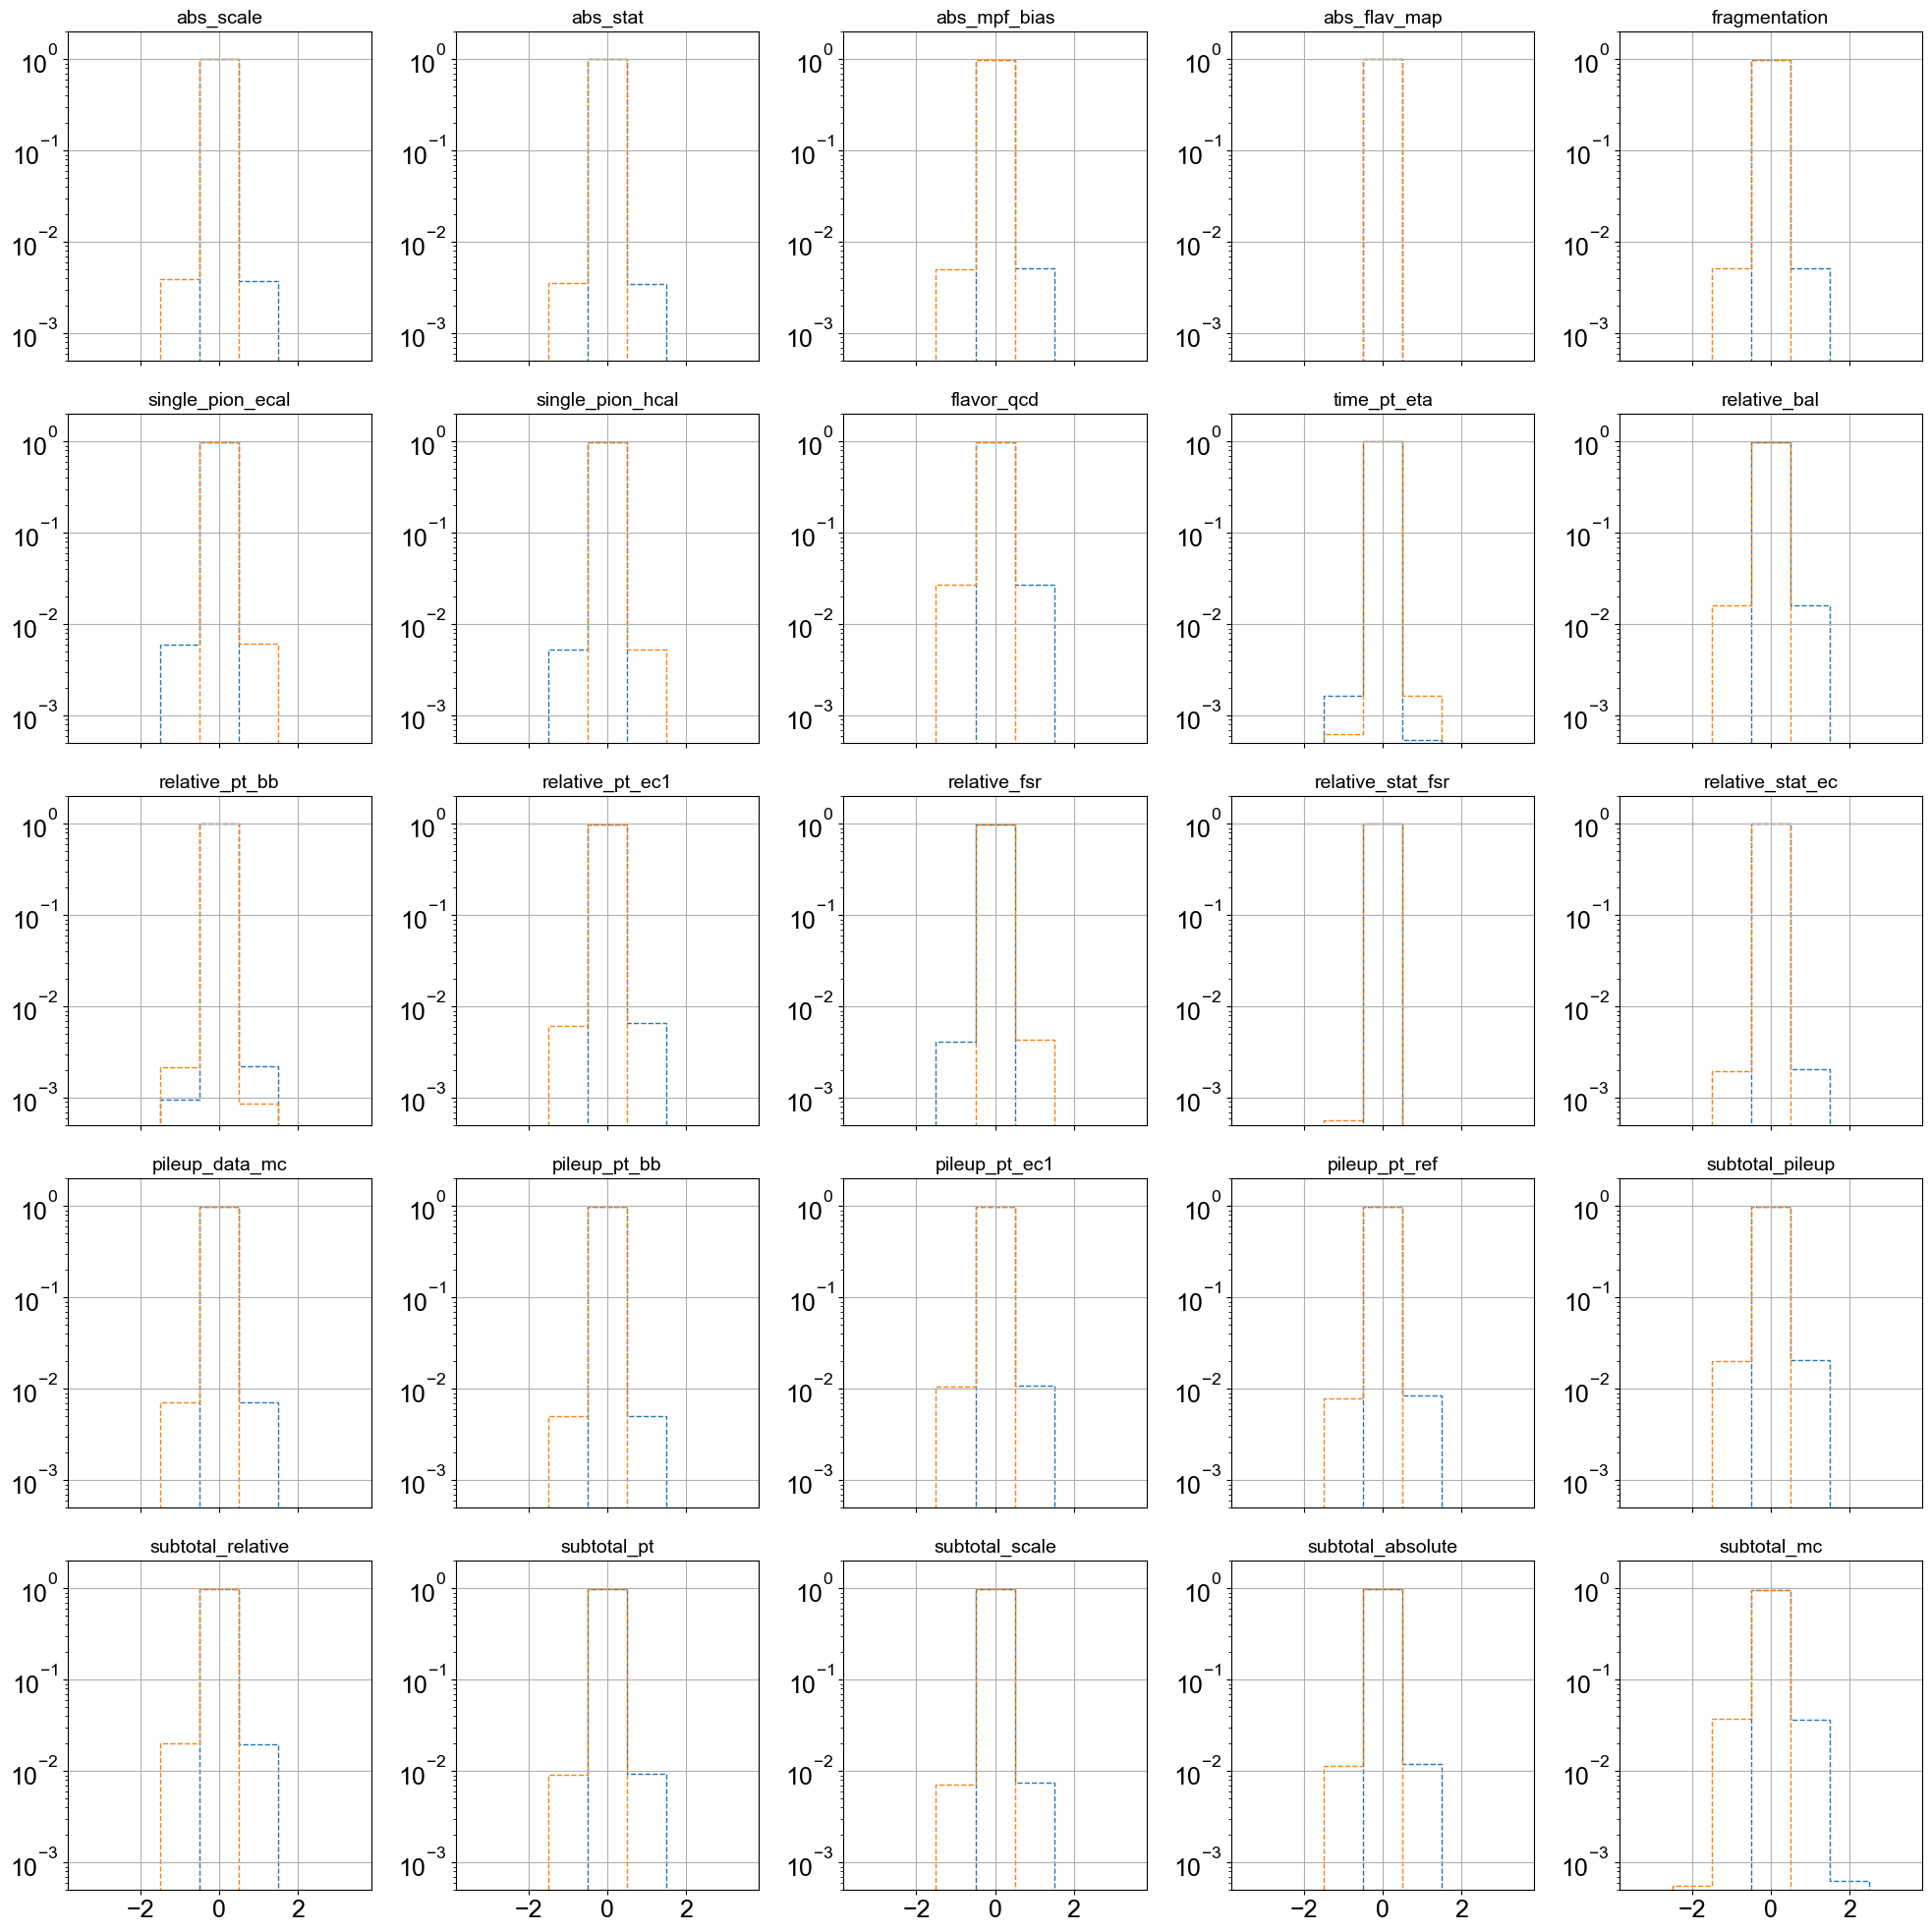

In [3]:
# make plots of the jet multiplicity for JES 
fig, axes = plt.subplots(5, 5, figsize=(20, 20), facecolor='white', sharey=False, sharex='col')
#fig.subplots_adjust(top=0.9)
#fig.suptitle(f'{selection}')


bins = np.linspace(-3.5, 3.5, 8)
for ix, name in enumerate(jec_source_names):
    if name == 'total':
        break
    
    ax = axes[ix//5, ix%5]
    h_up, _, _ = ax.hist(df[f'n_jets_jes_{name}_up'] - df.n_jets, bins=bins, color='C0', linestyle='--', histtype='step', density=True)
    h_down, _, _ = ax.hist(df[f'n_jets_jes_{name}_down'] - df.n_jets, bins=bins, color='C1', linestyle='--', histtype='step', density=True)
    ax.set_yscale('log')
    ax.set_title(name, fontsize=14)
    ax.set_ylim(5e-4, 2.)
    ax.grid()
    
plt.tight_layout()
plt.savefig(f'plots/systematics/{selection}_njets_jes.pdf')
plt.show()